###ACADEMIC INTEGRIY STATEMENT

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work

In [1]:
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 0s (1,908 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB o

In [2]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars

Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Air-Sea Battle - Air Sea Battle (Anti-Aircraft) (1977) (Atari, Larry Kaplan) (CX2602, CX2602P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle - Target Fun (Anti-Aircraft) (1977) (Atari, Larry Kaplan - Sears) (CX2602 - 99802, 6-99802, 49-75102) ~.bin       1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) (Prototype).bin        1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) ~.bin                  1%  OK 
Extracting  ROMS/Airlock (1983) (Gameworld) (133-004) (PAL).bin            1%  OK 
Extracting  ROMS/Alices Abenteuer - Lilly Adventure (1983) (Quelle - Otto Versand) (732.273 8 - 600273, 781644) (PAL).bin       1%  OK 
Extracting  ROMS/Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin       1%  OK 
Extracting  ROMS/Alien (CCE).bin                                        

In [3]:
!pip install gym
!pip install pyvirtualdisplay
!pip install piglet
!pip install pyglet

     |████████████████████████████████| 67 kB 1.8 MB/s 


In [4]:
import pyglet

import gym
import matplotlib.pyplot as plt
from gym import wrappers
from gym import logger as gymlogger
from gym import spaces
from gym.wrappers import Monitor

import numpy as np
import random
import time
from enum import Enum
import matplotlib
import matplotlib.pyplot as plt
from google.colab import widgets
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from IPython.display import clear_output

gymlogger.set_level(40)

%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
from torch import nn
import torch
from collections import deque
import random

In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [7]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [8]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


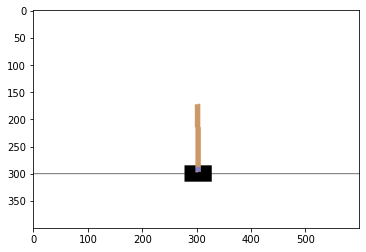

In [9]:
env1 = gym.make('CartPole-v1')
env1.reset()
plt.imshow(env1.render('rgb_array'))
print(env1.action_space)
print(env1.observation_space)

In [26]:
# for DQN
class Network(nn.Module):
  def __init__(self,env, states, action):
    super(Network, self).__init__()
    self.net = nn.Sequential(nn.Linear(states, 32), nn.ReLU(),nn.Linear(32, 32), nn.ReLU(),nn.Linear(32, action))
  
  def forward(self,x):
    return self.net(x)
  
  def act(self,obs):
    pass   

# for Double DQN
class Network_ddqn(nn.Module):
  def __init__(self,env, states, action):
    super(Network, self).__init__()
    self.net = nn.Sequential(nn.Linear(states, 32), nn.ReLU(),nn.Linear(32, 32), nn.ReLU(),nn.Linear(32, action))
  
  def forward(self,x):
    return self.net(x)
  
  def act(self,obs):
    pass       
###

In [11]:
env = gym.make('CartPole-v1')

In [12]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

In [27]:
### For DQN
online_net = Network(env, env.observation_space.shape[0], env.action_space.n)
target_net = Network(env, env.observation_space.shape[0], env.action_space.n)

# declare replay buffer
replay_buffer = deque(maxlen=5000)

# assign the same parameters of online net to target net
target_net.load_state_dict(online_net.state_dict())

# define optimizer
optimizer = torch.optim.Adam(online_net.parameters(), lr=0.001) # 0.005


In [14]:
# episodes=100

# for episode in range(episodes):
#     old_state = env.reset()
#     done = False
#     total = 0
#     while not done:
#         # Sample random actions
#         action = env.action_space.sample()
#         # Take action and extract results
#         new_state, reward, done, _ = env.step(action)
#         total += reward
#         done_i = int(done == True) 
#         trans = (old_state,action,reward,done_i,new_state)
#         replay_buffer.append(trans)
#         old_state=new_state
#         if done:
#             break
# print(len(replay_buffer))

In [15]:
class q_learning:

  def __init__(self,env):
    self.env = env
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values_tar=np.zeros((env.observation_space.shape[0],env.action_space.n))
    self.q_values =np.zeros((env.observation_space.shape[0],env.action_space.n))
    self.totalreward=[]
    self.stepstaken=[]
    self.stepno=0
    self.epsilondecay=[]
    self.epsilon=1
    self.lr=0.001
    self.gamma=0.9
    self.decay=0.99655           #ep 0.001 - 0.99885              # 2000 - 0.9978 #6000 - 0.9993
    self.rewardsum=0
    # self.r1_got = False
    # self.r3_got = False

  # for training
  def action1(self,old_state,epsilon):
    
    if np.random.rand()>epsilon:
      old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
      #print(online_net.forward(old_state_t).tolist())
      return np.argmax(online_net.forward(old_state_t).tolist())
    else:
      return np.random.randint(env.action_space.n)
  
  # for evalution
  def action2(self,old_state,epsilon):

    old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
    return np.argmax(online_net.forward(old_state_t).tolist())

  def training(self):
    
    count_step = 1
    for episode in range(2000):
      self.rewardsum = 0
      old_state = env.reset()
      done = False
      self.stepno=0
      while not done:
        action=self.action1(old_state,self.epsilon)
        new_state, reward, done, info = env.step(action)
        self.rewardsum+=reward

        
        if done == True:
          done_i = 1
        else:
          done_i = 0
        trans = (old_state,action,reward,done_i,new_state)
        old_state=new_state
        replay_buffer.append(trans)
        count_step +=1

        if len(replay_buffer) > 130:
          rand_trans = random.sample(replay_buffer, 128)
          obs_arr = np.array([t[0] for t in rand_trans])
          act_arr = np.array([t[1] for t in rand_trans])
          rew_arr = np.array([t[2] for t in rand_trans])
          don_arr = np.array([t[3] for t in rand_trans])
          nobs_arr = np.array([t[4] for t in rand_trans])

          # convert to pytorch array
          obs_t = torch.as_tensor(obs_arr,dtype=torch.float32)
          act_t = torch.as_tensor(act_arr,dtype=torch.int64).unsqueeze(-1)
          rew_t = torch.as_tensor(rew_arr,dtype=torch.float32).unsqueeze(-1)
          don_t = torch.as_tensor(don_arr,dtype=torch.int64).unsqueeze(-1)
          nobs_t = torch.as_tensor(nobs_arr,dtype=torch.float32)

          #compute target
          with torch.no_grad():
            target_q_value_t = target_net.forward(nobs_t)
          max_target_q_value = target_q_value_t.max(dim=1,keepdim=True)[0]            
          target = rew_t + self.gamma*(1-don_t)*max_target_q_value

          # get prediction
          q_value_t = online_net.forward(obs_t)
          action_q_value_t = torch.gather(input=q_value_t,dim=1,index=act_t)

          # compute loss
          loss = nn.functional.smooth_l1_loss(action_q_value_t,target)

          # gradient discent
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        #match online net to target net every few time
        if count_step % 1000 == 0: #50
          target_net.load_state_dict(online_net.state_dict())
          count_step = 1
            

      if episode % 100 == 0:
        print('episode = ',episode,'total_reward = ',self.rewardsum)
      
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      average_reward=0
      if episode>10:
        for i in range(10):
          average_reward+=self.totalreward[episode-i]
      if (average_reward/10)>=460:
        break
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay

  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.rewardsum = 0
      old_state = env.reset()
      done = False
      self.stepno=0
      while not done:

        # get current/old state
        #old_state = observation
        
        # choose action based on e-greedy        
        action=self.action2(old_state,self.epsilon)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        
        #get reward based on reward function
        reward = rew
        
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # pass new observation as old observation for next iteration
        old_state = new_observation

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)

In [16]:
class ddqn_learning:

  def __init__(self,env):
    self.env = env
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values_tar=np.zeros((env.observation_space.shape[0],env.action_space.n))
    self.q_values =np.zeros((env.observation_space.shape[0],env.action_space.n))
    self.totalreward=[]
    self.stepstaken=[]
    self.stepno=0
    self.epsilondecay=[]
    self.epsilon=1
    self.lr=0.001
    self.gamma=0.9
    self.decay=0.99655           #ep 0.001 - 0.99885              # 2000 - 0.9978 #6000 - 0.9993
    self.rewardsum=0
    # self.r1_got = False
    # self.r3_got = False

  # for training
  def action1(self,old_state,epsilon):
    
    if np.random.rand()>epsilon:
      old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
      #print(online_net.forward(old_state_t).tolist())
      return np.argmax(online_net.forward(old_state_t).tolist())
    else:
      return np.random.randint(env.action_space.n)
  
  # for evalution
  def action2(self,old_state,epsilon):

    old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
    return np.argmax(online_net.forward(old_state_t).tolist())

  def training(self):
    
    count_step = 1
    for episode in range(2000):
      self.rewardsum = 0
      old_state = env.reset()
      done = False
      self.stepno=0
      while not done:
        action=self.action1(old_state,self.epsilon)
        new_state, reward, done, info = env.step(action)
        self.rewardsum+=reward

        
        if done == True:
          done_i = 1
        else:
          done_i = 0
        trans = (old_state,action,reward,done_i,new_state)
        old_state=new_state
        replay_buffer.append(trans)
        count_step +=1

        if len(replay_buffer) > 130:
          rand_trans = random.sample(replay_buffer, 128)
          obs_arr = np.array([t[0] for t in rand_trans])
          act_arr = np.array([t[1] for t in rand_trans])
          rew_arr = np.array([t[2] for t in rand_trans])
          don_arr = np.array([t[3] for t in rand_trans])
          nobs_arr = np.array([t[4] for t in rand_trans])

          # convert to pytorch array
          obs_t = torch.as_tensor(obs_arr,dtype=torch.float32)
          act_t = torch.as_tensor(act_arr,dtype=torch.int64).unsqueeze(-1)
          rew_t = torch.as_tensor(rew_arr,dtype=torch.float32).unsqueeze(-1)
          don_t = torch.as_tensor(don_arr,dtype=torch.int64).unsqueeze(-1)
          nobs_t = torch.as_tensor(nobs_arr,dtype=torch.float32)

          #compute target
          with torch.no_grad():
            online_for_target_q = online_net.forward(nobs_t)
          # evalute target net
          with torch.no_grad():
            target_q_value_t_arr = target_net.forward(nobs_t)

          # find argmax of online net and use it to get q value in target net
          iter = 0
          target_q_value_arr = []
          for ten in online_for_target_q:
            action_argmax = torch.argmax(ten).item()
            target_q_value_argmax = target_q_value_t_arr[iter,action_argmax]
            target_q_value_arr.append(target_q_value_argmax)   
            # print('iter',iter)
            # print('online net q values: ',ten)
            # print('online argmax action: ',action_argmax)
            # print('target net action from online argmax action',target_q_value_argmax)
            # print('array to be used to compute target',target_q_value_arr)
            iter +=1

          target_q_value_t = torch.as_tensor(np.array(target_q_value_t_arr),dtype=torch.float32)
          target = rew_t + self.gamma*target_q_value_t

          # get prediction
          q_value_t = online_net.forward(obs_t)
          action_q_value_t = torch.gather(input=q_value_t,dim=1,index=act_t)

          # compute loss
          loss = nn.functional.smooth_l1_loss(action_q_value_t,target)

          # gradient discent
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        #match online net to target net every few time
        if count_step % 1000 == 0: #50
          target_net.load_state_dict(online_net.state_dict())
          count_step = 1
            

      if episode % 100 == 0:
        print('episode = ',episode,'total_reward = ',self.rewardsum)
      
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      average_reward=0
      if episode>10:
        for i in range(10):
          average_reward+=self.totalreward[episode-i]
      if (average_reward/10)>=460:
        break
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay

  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.rewardsum = 0
      old_state = env.reset()
      done = False
      self.stepno=0
      while not done:

        # get current/old state
        #old_state = observation
        
        # choose action based on e-greedy        
        action=self.action2(old_state,self.epsilon)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        
        #get reward based on reward function
        reward = rew
        
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # pass new observation as old observation for next iteration
        old_state = new_observation

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)

In [19]:
def QLimplemetation():
    print('Implementing DQN learning:\n')
    table1=q_learning(env)
    table1.training()

    print('Implementing Double DQN learning:\n')
    table2=ddqn_learning(env)
    table2.training()

    plot1 = plt.figure(1)
    plt.xlabel('Episodes')
    plt.title('DQN learning results after training for Cartpole')
    plt.plot(table1.totalreward)
    # plt.plot(table1.stepstaken)
    # plt.legend(['Reward per episode','Steps per episode'],loc='best')

    plot2 = plt.figure(2)
    plt.xlabel('Episodes')
    plt.title('Double DQN learning results during training for for Cartpole')
    plt.plot(table2.totalreward)

    plot3 = plt.figure(3)
    plt.xlabel('Episodes')
    plt.title('Compare between DQN and Double DQN during training for for Cartpole')
    plt.plot(table1.totalreward)
    plt.plot(table2.totalreward)
    plt.legend(['DQN','Double DQN'],loc='best')

    plot4 = plt.figure(4)
    plt.plot(table1.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon decay for DQN')

    plot5 = plt.figure(5)
    plt.plot(table2.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon decay for Double DQN')

    print('Evaluation results:')
    table1.evaluation()
    table2.evaluation()

    plot6=plt.figure(6)
    plt.xlabel('Episodes')
    plt.title('Compare between DQN and Double DQN during evaluation for for Cartpole:')
    plt.plot(table1.totalreward)
    plt.plot(table2.totalreward)
    plt.legend(['DQN','Double DQN'],loc='best')
    # plt.plot(table1.stepstaken)
    # plt.legend(['Reward per episode','Steps per episode'],loc='best')
    plt.show()


Implementing DQN learning:

episode =  0 total_reward =  16.0
episode =  100 total_reward =  55.0
episode =  200 total_reward =  13.0
episode =  300 total_reward =  25.0
episode =  400 total_reward =  109.0
episode =  500 total_reward =  253.0
episode =  600 total_reward =  118.0
episode =  700 total_reward =  163.0
episode =  800 total_reward =  132.0
episode =  900 total_reward =  177.0
episode =  1000 total_reward =  125.0
episode =  1100 total_reward =  97.0
episode =  1200 total_reward =  367.0
episode =  1300 total_reward =  97.0
episode =  1400 total_reward =  91.0
episode =  1500 total_reward =  273.0
Implementing Double DQN learning:

episode =  0 total_reward =  13.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


episode =  100 total_reward =  61.0
episode =  200 total_reward =  262.0
episode =  300 total_reward =  48.0
episode =  400 total_reward =  10.0
episode =  500 total_reward =  12.0
episode =  600 total_reward =  80.0
episode =  700 total_reward =  301.0
episode =  800 total_reward =  105.0
episode =  900 total_reward =  111.0
episode =  1000 total_reward =  98.0
episode =  1100 total_reward =  61.0
episode =  1200 total_reward =  125.0
episode =  1300 total_reward =  140.0
episode =  1400 total_reward =  150.0
episode =  1500 total_reward =  175.0
episode =  1600 total_reward =  158.0
episode =  1700 total_reward =  142.0
episode =  1800 total_reward =  146.0
episode =  1900 total_reward =  187.0
Evaluation results:


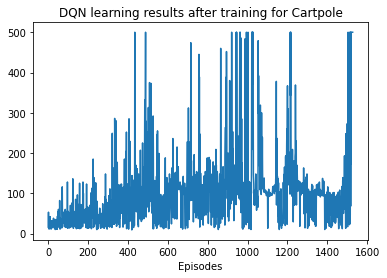

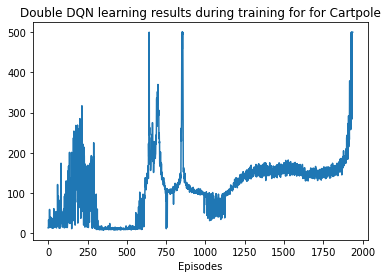

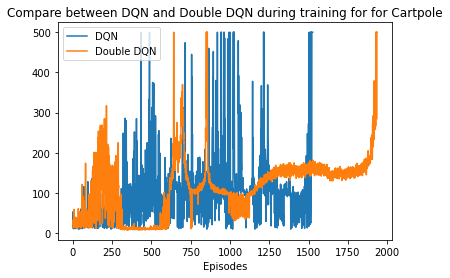

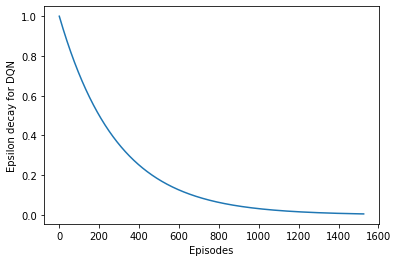

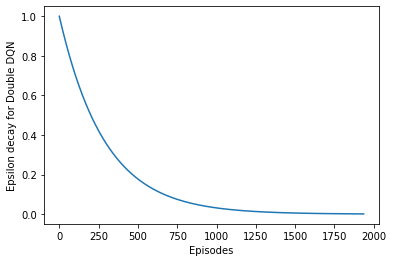

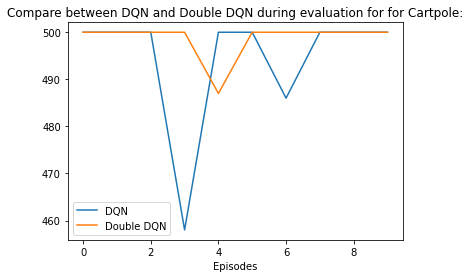

In [23]:
if __name__ == "__main__":
  QLimplemetation()